In [41]:
%pip install datasets==2.13
%pip install huggingface_hub==0.16.4
%pip install pyarrow>=8.0.0
%pip install torch
%pip install transformers
%pip install -U datasets
%pip install Pillow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached huggingface_hub-0.16.4-py3-none-any.whl.metadata (12 kB)
Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.38.1 requires huggingface-hub<1.0,>=0.19.3, but you have huggingface-hub 0.16.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
zsh:1: 8.0.0 not found
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached huggingface_hub-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached huggingface_hub-0.20.3-py3-none-any.whl (330 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.16.4
    Uninstalling huggingface-hub-0.16.4:
      Successfully uninstalled huggingface-hub-0.16.4
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached fsspec-2023.10.0-py3-none-any.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 10.1 MB/s eta 0:00:0000:01
Using cached fsspec-2023.10.0-py3-none-any.whl (166 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.2.0
    Uninstalling fsspec-2024.2.0:
      Successfully uninstalled fsspec-2024.2.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.13.0
    Uninstalling datasets-2.13.0:
      Successfully uninstalled datasets-2.13.0
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import torch
import huggingface_hub as hf_hub
import datasets
import transformers

#### Use pretrained Roberta model to predict the emoji of a given tweet

In [4]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

In [5]:
print(tokenizer)

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-emoji', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}


In [6]:
model = AutoModel.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

pytorch_model.bin: 100%|██████████| 499M/499M [00:15<00:00, 32.5MB/s] 
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emoji and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
config = model.config

print(model.config.architectures)

['RobertaForSequenceClassification']


In [8]:
from transformers import AutoModelForSequenceClassification # AutoModel is designed to only load the base model parameters but not task specific models

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

In [9]:
# you can also EXPLICITLY import the task specific tokenzier and model, e.g.

from transformers import RobertaTokenizerFast
from transformers import RobertaForSequenceClassification

tokenizer = RobertaTokenizerFast.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

#### Creating an NLP Pipeline for Language Translation

In [35]:
from transformers import AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

In [36]:
# inference prep
source_lang = "English"
target_lang = "German"
input_text = f"translate {source_lang} to {target_lang}: How old are you?"

inputs = tokenizer(input_text, return_tensors="pt")

for key, value in inputs.items():
    print(key, value)

input_ids tensor([[13959,  1566,    12,  2968,    10,   571,   625,    33,    25,    58,
             1]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [37]:
# time for inference
with torch.no_grad(): # prevent gradient accumulation
    outputs = model.generate(**inputs) # perform inference with unpacked dictionary as multiple arguments

print(len(outputs)) # length aka batch size is going to be 1 because only 1 input

1


In [38]:
print(outputs) # sequence of token IDs; each token represents a unique word or punctuation in the vocabulary but need to map each ID to corresponding word

tensor([[   0, 2739,  625,  436,  292,   58,    1]])


In [39]:
print(tokenizer.decode(outputs[0]))

<pad> Wie old sind Sie?</s>


#### Exploring the Datasets Library

In [1]:
from datasets import load_dataset

dataset = load_dataset("adirik/fashion_image_caption-100")

print(dataset)

/Users/jenniferjordache/Developer/Hugging-Face-Projects/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 100
    })
})


{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=384x384 at 0x125C8C790>, 'text': 'A dress with Color: Multicolored, Department: Dresses, Detail: Ruffle, Fabric-Elasticity: Slight Stretch, Fit: Fitted, Hemline: Slit, Material: Gabardine, Neckline: Round, Pattern: All Over Print, Sleeve-Length: Sleeveless, Style: Casual, Type: T Shirt, Waistline: Regular'}


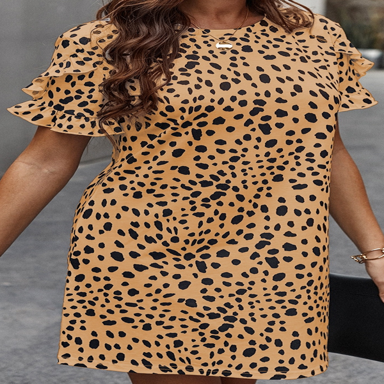

In [2]:
print(dataset["train"][1])

dataset["train"][1]["image"]

# can also download only specific split of the data: dataset = load_dataset("adirik/fashion_image_caption-100", split="train")
# streaming = True will download smaller subsets

#### Generating better captions for an image dataset (Multi-Modal pipeline)

In [3]:
from transformers import BlipProcessor, BlipForConditionalGeneration

preprocessor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

tokenizer_config.json: 100%|██████████| 506/506 [00:00<00:00, 1.55MB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 3.40MB/s]
tokenizer.json: 100%|██████████| 711k/711k [00:00<00:00, 3.37MB/s]
special_tokens_map.json: 100%|██████████| 125/125 [00:00<00:00, 330kB/s]
config.json: 100%|██████████| 4.56k/4.56k [00:00<00:00, 8.77MB/s]
pytorch_model.bin: 100%|██████████| 990M/990M [00:29<00:00, 33.2MB/s] 


In [5]:
inputs = preprocessor(dataset["train"][1]["image"], return_tensors="pt")

In [9]:
# for single image
with torch.no_grad():
    outputs = model.generate(**inputs)

caption = preprocessor.decode(outputs[0], skip_special_tokens=True)

print(caption)

# replace captions across all images in dataset via map function, e.g. new_dataset = dataset.map(replace_caption)

/Users/jenniferjordache/Developer/Hugging-Face-Projects/.venv/lib/python3.11/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a woman in a leopard print dress
